## 1.  Import the spam dataset  

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('spam_dataset.csv')
df.columns = df.columns.str.rstrip(':')  #Remove the colon
df.head(6)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## 2. Features Selection

In [14]:
df.isna().sum() #Checking the Null value

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [15]:
from sklearn.model_selection import train_test_split

y = df['spam'] 
x = df.loc[:, df.columns != 'spam'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42) 

x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [16]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func = f_classif)
fit = test.fit(x, y)

p_value = pd.Series(fit.scores_, index = x.columns)
p_value.sort_values(ascending = False, inplace = True)
p_value

word_freq_your                791.726012
word_freq_000                 580.534452
word_freq_remove              570.169634
char_freq_$                   538.029935
word_freq_you                 372.273985
word_freq_free                342.346240
word_freq_business            342.316290
word_freq_hp                  324.490814
capital_run_length_total      304.417709
word_freq_our                 285.890659
char_freq_!                   285.810155
word_freq_receive             267.687159
word_freq_hpl                 263.930408
word_freq_over                263.060625
word_freq_order               260.549947
word_freq_money               225.314579
capital_run_length_longest    225.283327
word_freq_internet            205.486673
word_freq_email               200.128275
word_freq_all                 185.665407
word_freq_addresses           183.543361
word_freq_credit              171.792881
word_freq_george              160.081358
word_freq_1999                150.561998
word_freq_labs  

The three most important variables are 'word_freq_your', 'word_freq_000', 'word_freq_remove'. 

SelectKBest is a function that provide the most significant features from the dataset. Adopting ANOVA test, for numerical input and categorical output, could generate the f score for each variable. The higher the score is, the lower the p-value is, which means these features showcase a strong association between them and the target. 

 

## 3.  Visualize the univariate distribution of each of the variables  



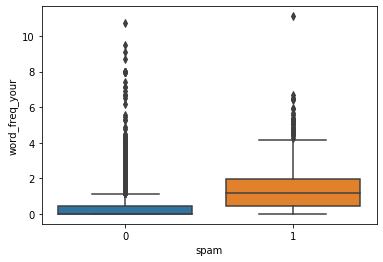

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='spam', y='word_freq_your', data=df)

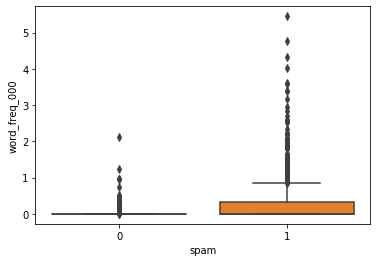

In [19]:
sns.boxplot(x='spam', y='word_freq_000', data=df)

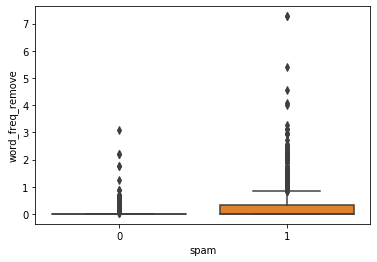

In [20]:
sns.boxplot(x='spam', y='word_freq_remove', data=df)

## 4. Models


In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

kfold = KFold(n_splits=5)

In [22]:
from sklearn.model_selection import train_test_split

y = df['spam'] 
X = df.loc[:, ['word_freq_your', 'word_freq_000', 'word_freq_remove']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [23]:
from sklearn import preprocessing

# Scaling Data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.1 Logistic Regression

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("LOGISTIC REGRESSION (UNSCALED DATA)")
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))

LOGISTIC REGRESSION (UNSCALED DATA)
Training set score: 0.82
Test set score: 0.80
Mean Cross Validation, KFold: 0.82


In [25]:
logreg_scaled = LogisticRegression().fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(logreg_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(logreg_scaled, X_train_scaled, y_train, cv=kfold))))

LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.82
Test set score: 0.80
Mean Cross Validation, KFold: 0.82


### Logistic Regression GridSearchCV

In [26]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
#print(logreg_pipe.steps) 
# Name of step = 'logisticregression' + __ + C

logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("best mean cross-validation score: {:.3f}".format(logreg_grid.best_score_))
print("Test set Score: {:.2f}".format(logreg_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(logreg_grid.best_params_))

LOGISTIC REGRESSION (SCALED DATA)
best mean cross-validation score: 0.820
Test set Score: 0.80
Best Parameter: {'logisticregression__C': 1.0}


The best parameter is C = 1.0

### 4.2 K-Nearest Neighbors


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

print("KNN CLASSIFER (UNSCALED DATA)")
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))

KNN CLASSIFER (UNSCALED DATA)
Training set score: 0.86
Test set score: 0.80
Mean Cross Validation, KFold: 0.82


In [28]:
knn_scaled = KNeighborsClassifier(n_neighbors = 3).fit(X_train_scaled, y_train)

print("KNN CLASSIFER (SCALED DATA)")
print("Training set score: {:.2f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train, cv=kfold))))

KNN CLASSIFER (SCALED DATA)
Training set score: 0.87
Test set score: 0.81
Mean Cross Validation, KFold: 0.82


### KNN GridSearchCV

In [29]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid).fit(X_train_scaled, y_train)

print("KNN CLASSIFER (SCALED DATA)")
print("best mean cross-validation score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(knn_grid.best_params_))

KNN CLASSIFER (SCALED DATA)
best mean cross-validation score: 0.829
Test set Score: 0.81
Best Parameter: {'kneighborsclassifier__n_neighbors': 8}


The best parameter is n_neighbors = 8. KNN predicts the test set better than Logistic Regression.

### 4.3 Support Vector Machine



In [30]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

print("SVC(UNSCALED DATA)")
print("Training set score: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(svc, X_train, y_train, cv=kfold))))

SVC(UNSCALED DATA)
Training set score: 0.83
Test set score: 0.81
Mean Cross Validation, KFold: 0.82


In [31]:
svc_scaled = SVC().fit(X_train_scaled, y_train)

print("SVC(SCALED DATA)")
print("Training set score: {:.2f}".format(svc_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(svc_scaled.score(X_test_scaled, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(svc_scaled, X_train_scaled, y_train, cv=kfold))))

SVC(SCALED DATA)
Training set score: 0.83
Test set score: 0.81
Mean Cross Validation, KFold: 0.83


### SVC GridSearchCV

In [32]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(svd_solver='randomized',n_components=3, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [33]:
svc_pipe = make_pipeline(StandardScaler(), pca, svc)

svc_param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
svc_grid = GridSearchCV(svc_pipe, svc_param_grid).fit(X_train_scaled, y_train)

print("SVC (SCALED DATA)")
print("best mean cross-validation score: {:.3f}".format(svc_grid.best_score_))
print("Test set Score: {:.2f}".format(svc_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(svc_grid.best_params_))

SVC (SCALED DATA)
best mean cross-validation score: 0.821
Test set Score: 0.81
Best Parameter: {'svc__C': 50, 'svc__gamma': 0.0005}


The best parameter is C = 10 and gamma = 0.005

### 4.4 Random Forest


In [34]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

print("RANDOM FOREST CLASSIFER (UNSCALED DATA)")
print("Training set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(forest, X_train, y_train, cv=kfold))))

RANDOM FOREST CLASSIFER (UNSCALED DATA)
Training set score: 0.89
Test set score: 0.82
Mean Cross Validation, KFold: 0.82


In [35]:
forest_scaled = RandomForestClassifier(n_estimators=100).fit(X_train_scaled, y_train)

print("RANDOM FOREST CLASSIFER (SCALED DATA)")
print("Training set score: {:.2f}".format(forest_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(forest_scaled.score(X_test_scaled, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(forest, X_train_scaled, y_train, cv=kfold))))

RANDOM FOREST CLASSIFER (SCALED DATA)
Training set score: 0.89
Test set score: 0.82
Mean Cross Validation, KFold: 0.82


### Random Forest GridSearchCV

In [36]:
forest_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

forest_param_grid = {'randomforestclassifier__n_estimators': range(10, 100)}
forest_grid = GridSearchCV(forest_pipe, forest_param_grid).fit(X_train_scaled, y_train)

print("RANDOM FOREST CLASSIFER (SCALED DATA)")
print("best mean cross-validation score: {:.3f}".format(forest_grid.best_score_))
print("Test set Score: {:.2f}".format(forest_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(forest_grid.best_params_))

RANDOM FOREST CLASSIFER (SCALED DATA)
best mean cross-validation score: 0.829
Test set Score: 0.82
Best Parameter: {'randomforestclassifier__n_estimators': 55}


## 5. Best Model


### Test Set Score

In [37]:
print("LOGISTIC REGRESSION")
print("Before Gridsearch: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.2f}".format(logreg_grid.score(X_test_scaled, y_test)))
print("")
print("KNN CLASSIFIER")
print("Before Gridsearch: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))
print("")
print("SUPPORT VECTOR MACHINE")
print("Before Gridsearch: {:.2f}".format(svc_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.2f}".format(svc_grid.score(X_test_scaled, y_test)))
print("")
print("RANDOM FOREST CLASSIFIER")
print("Before Gridsearch: {:.2f}".format(forest_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.2f}".format(forest_grid.score(X_test_scaled, y_test)))

LOGISTIC REGRESSION
Before Gridsearch: 0.80
After Gridsearch: 0.80

KNN CLASSIFIER
Before Gridsearch: 0.81
After Gridsearch: 0.81

SUPPORT VECTOR MACHINE
Before Gridsearch: 0.81
After Gridsearch: 0.81

RANDOM FOREST CLASSIFIER
Before Gridsearch: 0.82
After Gridsearch: 0.82


Random Forest is the best model

## 6. New Dataframe with Three More Important Features

In [38]:
X1 = df.loc[:, ['word_freq_your', 'word_freq_000', 'word_freq_remove', 'char_freq_$', 'word_freq_you', 'word_freq_free']]

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state=42) 

X1.head() 

,word_freq_your,word_freq_000,word_freq_remove,char_freq_$,word_freq_you,word_freq_free
0,0.96,0.00,0.00,0.000,1.93,0.32
1,1.59,0.43,0.21,0.180,3.47,0.14
2,0.51,1.16,0.19,0.184,1.36,0.06
3,0.31,0.00,0.31,0.000,3.18,0.31
4,0.31,0.00,0.31,0.000,3.18,0.31


In [39]:
# Scaling Data
scaler_new = preprocessing.StandardScaler().fit(X1_train)
X1_train_scaled = scaler_new.transform(X1_train)
X1_test_scaled = scaler_new.transform(X1_test)

In [41]:
logreg1_pipe = make_pipeline(StandardScaler(), LogisticRegression()) 
#print(logreg_pipe.steps) 
# Name of step = 'logisticregression' + __ + C

logreg1_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
logreg1_grid = GridSearchCV(logreg1_pipe, logreg1_param_grid).fit(X1_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("best mean cross-validation score: {:.3f}".format(logreg1_grid.best_score_))
print("Test set Score: {:.2f}".format(logreg1_grid.score(X1_test_scaled, y_test)))
print("Best Parameter: {}".format(logreg1_grid.best_params_))

LOGISTIC REGRESSION (SCALED DATA)
best mean cross-validation score: 0.855
Test set Score: 0.85
Best Parameter: {'logisticregression__C': 51.0}


In [42]:
knn1_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn1_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
knn1_grid = GridSearchCV(knn1_pipe, knn1_param_grid).fit(X1_train_scaled, y_train)

print("KNN CLASSIFER (SCALED DATA)")
print("best mean cross-validation score: {:.3f}".format(knn1_grid.best_score_))
print("Test set Score: {:.2f}".format(knn1_grid.score(X1_test_scaled, y_test)))
print("Best Parameter: {}".format(knn1_grid.best_params_))

KNN CLASSIFER (SCALED DATA)
best mean cross-validation score: 0.876
Test set Score: 0.87
Best Parameter: {'kneighborsclassifier__n_neighbors': 7}


In [43]:
svc1_pipe = make_pipeline(StandardScaler(), pca, svc)

svc1_param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
svc1_grid = GridSearchCV(svc1_pipe, svc1_param_grid).fit(X1_train_scaled, y_train)

print("SVC (SCALED DATA)")
print("best mean cross-validation score: {:.3f}".format(svc1_grid.best_score_))
print("Test set Score: {:.2f}".format(svc1_grid.score(X1_test_scaled, y_test)))
print("Best Parameter: {}".format(svc1_grid.best_params_))

SVC (SCALED DATA)
best mean cross-validation score: 0.866
Test set Score: 0.86
Best Parameter: {'svc__C': 50, 'svc__gamma': 0.005}


In [44]:
forest1_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

forest1_param_grid = {'randomforestclassifier__n_estimators': range(10, 100)}
forest1_grid = GridSearchCV(forest1_pipe, forest1_param_grid).fit(X1_train_scaled, y_train)

print("RANDOM FOREST CLASSIFER (SCALED DATA)")
print("best mean cross-validation score: {:.3f}".format(forest1_grid.best_score_))
print("Test set Score: {:.2f}".format(forest1_grid.score(X1_test_scaled, y_test)))
print("Best Parameter: {}".format(forest1_grid.best_params_))

RANDOM FOREST CLASSIFER (SCALED DATA)
best mean cross-validation score: 0.885
Test set Score: 0.88
Best Parameter: {'randomforestclassifier__n_estimators': 71}


In [47]:
print("LOGISTIC REGRESSION")
print("Test set Score: {:.2f}".format(logreg1_grid.score(X1_test_scaled, y_test)))
print("")
print("KNN CLASSIFIER")
print("Test set Score: {:.2f}".format(knn1_grid.score(X1_test_scaled, y_test)))
print("")
print("SUPPORT VECTOR MACHINE")
print("Test set Score: {:.2f}".format(svc1_grid.score(X1_test_scaled, y_test)))
print("")
print("RANDOM FOREST CLASSIFIER")
print("Test set Score: {:.2f}".format(forest1_grid.score(X1_test_scaled, y_test)))

LOGISTIC REGRESSION
Test set Score: 0.85

KNN CLASSIFIER
Test set Score: 0.87

SUPPORT VECTOR MACHINE
Test set Score: 0.86

RANDOM FOREST CLASSIFIER
Test set Score: 0.88


After adding three more features, all models provide a higher accuracy, while Random Forest still remains as the best model.